In [3]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
import numpy as np
import torch
from dotenv import load_dotenv
from pathlib import Path
import os
load_dotenv()
session_A = 501704220  # This is three session A
session_B = 501559087
session_C = 501474098
allen_cache_path = os.environ.get('HGMS_ALLEN_CACHE_PATH')
boc = BrainObservatoryCache(manifest_file=str(
        Path(allen_cache_path) / Path('brain_observatory_manifest.json')))
raw_data_dct = {}
movie_one_dataset = boc.get_ophys_experiment_data(session_A)
raw_data_dct['natural_movie_one'] = movie_one_dataset.get_stimulus_template(
        'natural_movie_one')
natural_stimuli = boc.get_ophys_experiment_data(session_B)
raw_data_dct['natural_scenes'] = natural_stimuli.get_stimulus_template(
        'natural_scenes')


In [5]:
raw_data_dct['natural_scenes']

array([[[165., 165., 165., ...,  69.,  54.,  54.],
        [165., 165., 165., ...,  69.,  54.,  54.],
        [165., 165., 165., ...,  69.,  54.,  54.],
        ...,
        [144., 144., 144., ..., 161., 197., 197.],
        [131., 131., 131., ..., 231., 244., 244.],
        [131., 131., 131., ..., 231., 244., 244.]],

       [[ 77.,  77.,  77., ...,  79.,  95.,  95.],
        [ 77.,  77.,  77., ...,  79.,  95.,  95.],
        [ 77.,  77.,  77., ...,  79.,  95.,  95.],
        ...,
        [ 63.,  63.,  63., ...,  86.,  87.,  87.],
        [ 70.,  70.,  70., ...,  47.,  51.,  51.],
        [ 70.,  70.,  70., ...,  47.,  51.,  51.]],

       [[193., 193., 193., ..., 178., 186., 186.],
        [193., 193., 193., ..., 178., 186., 186.],
        [193., 193., 193., ..., 178., 186., 186.],
        ...,
        [176., 176., 176., ..., 218., 215., 215.],
        [173., 173., 173., ..., 211., 211., 211.],
        [173., 173., 173., ..., 211., 211., 211.]],

       ...,

       [[ 64.,  64.,  64

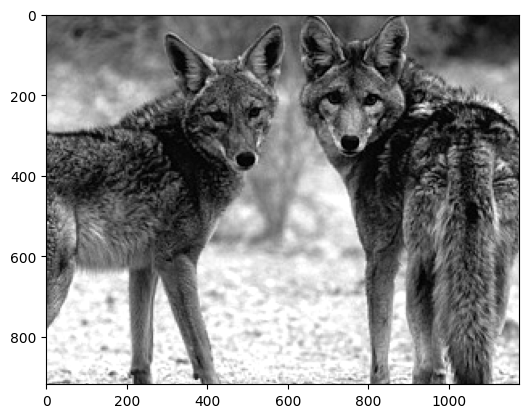

In [61]:
import matplotlib.pyplot as plt
plt.imshow(raw_data_dct['natural_scenes'][29, :, :], cmap='gray')    

In [60]:
labels=['bear','bear','bear','turtle','bird','lion','lion', 'lion', 'elephant', 'elephant', 'tiger','tiger','tiger','fox','wolf','cheetah','leopard','leopard','bird','bird',
        'landscape','bird','leopard','monkey','bird','otter','lizard','tiger','bird','wolf']
print(len(labels))
z=0
for i in labels:
    print(z)
    z+=1

29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28


In [9]:
import pickle
dat=pickle.load(open('/home/maria/Documents/HuggingMouseData/TransformerEmbeddings/openai_clip-vit-base-patch32_embeddings.pkl','rb'))
dat.keys()

dict_keys(['natural_movie_one', 'natural_movie_two', 'natural_movie_three', 'natural_scenes'])

{'lion': array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337]), 'bear': array([-0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004]), 'tiger': array([-0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783]), 'turtle': array([-0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ]), 'bird': array([ 1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272]), 'elephant': array([ 0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375])}


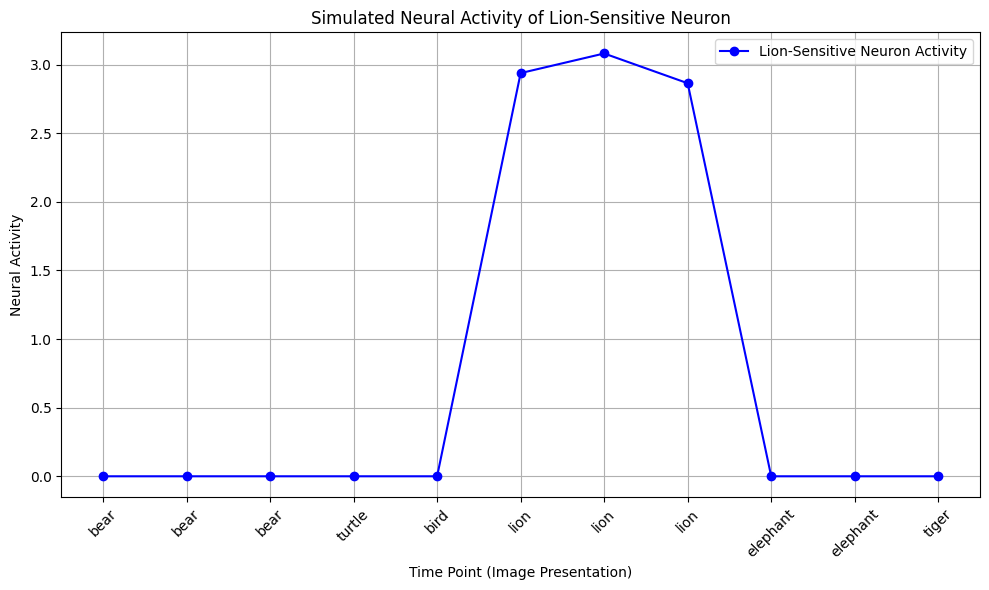

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Sample labels for the images
labels = ['bear','bear','bear','turtle','bird','lion','lion', 'lion', 'elephant', 'elephant', 'tiger']

# Create a dictionary to assign an embedding for each label (as vectors, for simplicity let's use random embeddings)
np.random.seed(42)  # For reproducibility
embeddings = {label: np.random.randn(5) for label in set(labels)}
print(embeddings)
# Define the weight vector for the lion-sensitive neuron
# We will assume the "lion" embedding defines the neuron selectivity
w_lion = embeddings['lion']

# Dot product with each embedding will generate the base response of the neuron
def compute_neural_activity(embedding, w_lion, bias=0.0, noise_std=0.1):
    """
    Compute neural activity as a dot product between the embedding and the weight vector of the neuron,
    adding some noise to simulate variability in neural responses.
    """
    # Base neural response (dot product) + bias
    response = np.dot(embedding, w_lion) + bias
    # Add noise (Gaussian)
    noisy_response = response + np.random.normal(0, noise_std)
    # Non-linearity (ReLU activation function)
    activity = max(0, noisy_response)
    
    return activity

# Simulate neural activity for each image
neural_activities = []
for label in labels:
    embedding = embeddings[label]
    activity = compute_neural_activity(embedding, w_lion)
    neural_activities.append(activity)

# Plot the results
time_points = np.arange(len(labels))

plt.figure(figsize=(10, 6))
plt.plot(time_points, neural_activities, marker='o', linestyle='-', color='b', label='Lion-Sensitive Neuron Activity')
plt.xticks(time_points, labels, rotation=45)
plt.xlabel('Time Point (Image Presentation)')
plt.ylabel('Neural Activity')
plt.title('Simulated Neural Activity of Lion-Sensitive Neuron')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


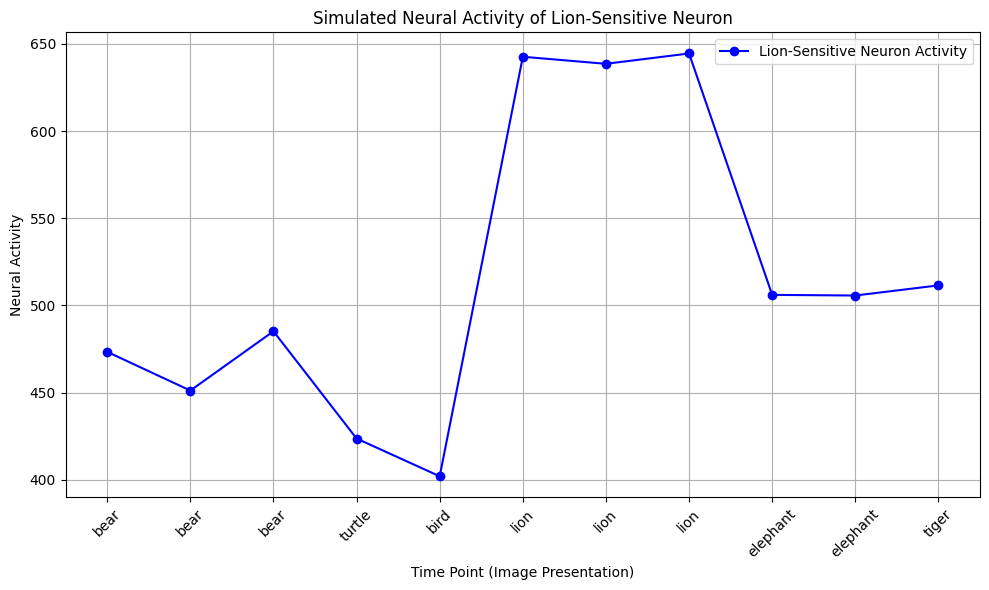

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Provided labels for the images
labels = ['bear', 'bear', 'bear', 'turtle', 'bird', 'lion', 'lion', 'lion', 'elephant', 'elephant', 'tiger']

# Embeddings for the images (assuming this is a numpy array)
# embeddings should be extracted from the dataset and have shape (len(labels), embedding_dim)
# For this example, I assume dat['natural_scenes'][:len(labels)] already contains embeddings
# embeddings = dat['natural_scenes'][:len(labels)]  # Uncomment this when you have the actual data
# For demonstration, let’s assume embeddings is a numpy array with the same length as the labels

# Assuming dat['natural_scenes'] contains 5-dimensional embeddings
# Here we simulate this array for demonstration (replace this with actual data)
np.random.seed(42)
embeddings = dat['natural_scenes'][:len(labels)]  # Assuming this is the actual data

# Identify the lion embeddings (based on the indices where the label is 'lion')
lion_indices = [i for i, label in enumerate(labels) if label == 'lion']

# Let's assume the neuron is sensitive to 'lion' images, we can create a weight vector that is related to lion images
# For simplicity, we will take the mean of the lion embeddings to define the 'lion-sensitive' weight vector
w_lion = np.mean(embeddings[lion_indices], axis=0)

# Dot product with each embedding will generate the base response of the neuron
def compute_neural_activity(embedding, w_lion, bias=0.0, noise_std=0.2):
    """
    Compute neural activity as a dot product between the embedding and the weight vector of the neuron,
    adding some noise to simulate variability in neural responses.
    """
    # Base neural response (dot product) + bias
    response = np.dot(embedding, w_lion) + bias
    # Add noise (Gaussian)
    noisy_response = response + np.random.normal(0, noise_std)
    # Non-linearity (ReLU activation function)
    activity = max(0, noisy_response)
    
    return activity

# Simulate neural activity for each image
neural_activities = []
for embedding in embeddings:
    activity = compute_neural_activity(embedding, w_lion)
    neural_activities.append(activity)

# Plot the results
time_points = np.arange(len(labels))

plt.figure(figsize=(10, 6))
plt.plot(time_points, neural_activities, marker='o', linestyle='-', color='b', label='Lion-Sensitive Neuron Activity')
plt.xticks(time_points, labels, rotation=45)
plt.xlabel('Time Point (Image Presentation)')
plt.ylabel('Neural Activity')
plt.title('Simulated Neural Activity of Lion-Sensitive Neuron')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117]


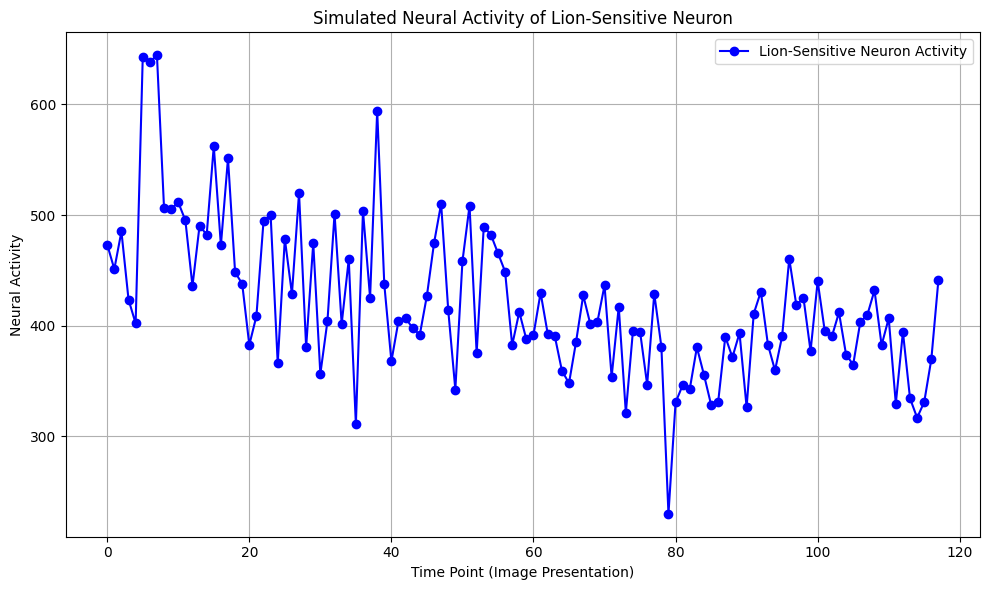

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Provided labels for the images
labels = ['bear', 'bear', 'bear', 'turtle', 'bird', 'lion', 'lion', 'lion', 'elephant', 'elephant', 'tiger']

# Embeddings for the images (assuming this is a numpy array)
# embeddings should be extracted from the dataset and have shape (len(labels), embedding_dim)
# For this example, I assume dat['natural_scenes'][:len(labels)] already contains embeddings
# embeddings = dat['natural_scenes'][:len(labels)]  # Uncomment this when you have the actual data
# For demonstration, let’s assume embeddings is a numpy array with the same length as the labels

# Assuming dat['natural_scenes'] contains 5-dimensional embeddings
# Here we simulate this array for demonstration (replace this with actual data)
np.random.seed(42)
embeddings = dat['natural_scenes'][:]  # Assuming this is the actual data

# Identify the lion embeddings (based on the indices where the label is 'lion')
lion_indices = [i for i, label in enumerate(labels) if label == 'lion']

# Let's assume the neuron is sensitive to 'lion' images, we can create a weight vector that is related to lion images
# For simplicity, we will take the mean of the lion embeddings to define the 'lion-sensitive' weight vector
w_lion = np.mean(embeddings[lion_indices], axis=0)

# Dot product with each embedding will generate the base response of the neuron
def compute_neural_activity(embedding, w_lion, bias=0.0, noise_std=0.2):
    """
    Compute neural activity as a dot product between the embedding and the weight vector of the neuron,
    adding some noise to simulate variability in neural responses.
    """
    # Base neural response (dot product) + bias
    response = np.dot(embedding, w_lion) + bias
    # Add noise (Gaussian)
    noisy_response = response + np.random.normal(0, noise_std)
    # Non-linearity (ReLU activation function)
    activity = max(0, noisy_response)
    
    return activity

# Simulate neural activity for each image
neural_activities = []
#print(embeddings.shape)
for embedding in embeddings:
    #print(embedding.shape)
    activity = compute_neural_activity(embedding, w_lion)
    neural_activities.append(activity)

# Plot the results
time_points = np.arange(118)
print(time_points)

plt.figure(figsize=(10, 6))
plt.plot(time_points, neural_activities, marker='o', linestyle='-', color='b', label='Lion-Sensitive Neuron Activity')
#plt.xticks(time_points, labels, rotation=45)
plt.xlabel('Time Point (Image Presentation)')
plt.ylabel('Neural Activity')
plt.title('Simulated Neural Activity of Lion-Sensitive Neuron')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


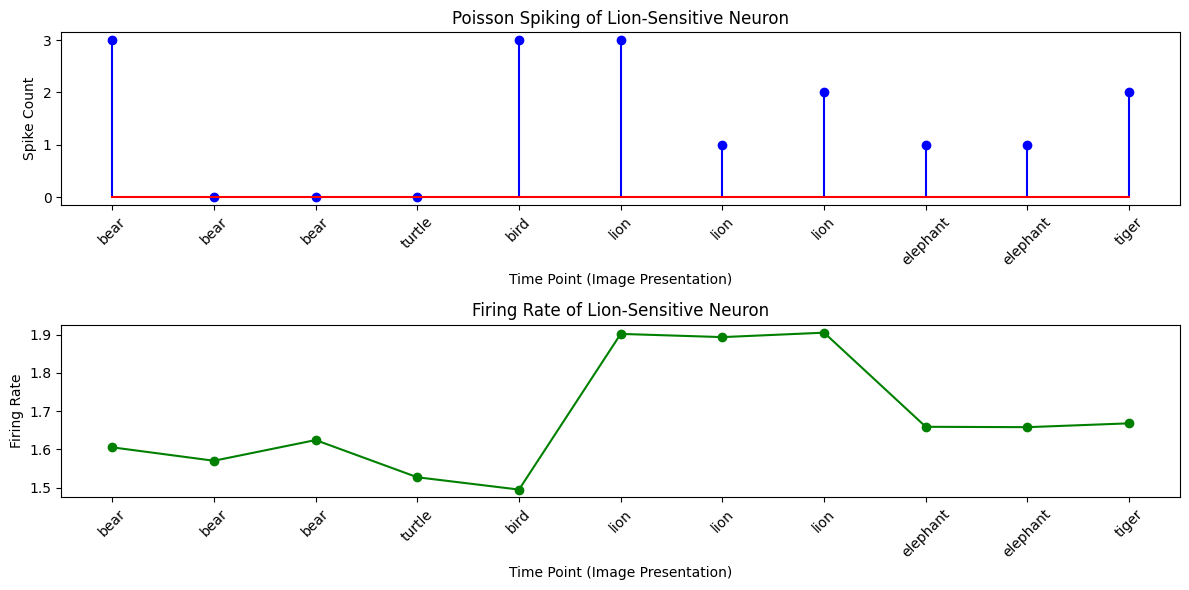

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Provided labels for the images
labels = ['bear', 'bear', 'bear', 'turtle', 'bird', 'lion', 'lion', 'lion', 'elephant', 'elephant', 'tiger']

# Embeddings for the images (assuming this is a numpy array)
# embeddings = dat['natural_scenes'][:len(labels)]  # Uncomment this when you have the actual data
# For demonstration, let's simulate random embeddings (replace this with actual data)
np.random.seed(42)
embeddings = dat['natural_scenes'][:len(labels)]

# Identify the lion embeddings (based on the indices where the label is 'lion')
lion_indices = [i for i, label in enumerate(labels) if label == 'lion']

# Define the weight vector for a lion-sensitive neuron by averaging lion embeddings
w_lion = np.mean(embeddings[lion_indices], axis=0)

# Linear-Nonlinear-Poisson model parameters
def compute_poisson_spiking(embedding, w_lion, bias=0.0):
    """
    Compute spiking activity using the LNP model:
    1. Linear stage: dot product between the embedding and the weight vector.
    2. Non-linear stage: apply exponential non-linearity to get the firing rate.
    3. Poisson stage: simulate spiking activity based on Poisson process with this rate.
    """
    # Linear stage: Dot product between embedding and weights + bias
    linear_response = np.dot(embedding, w_lion) + bias
    
    # Non-linear stage: Exponential non-linearity to get firing rate
    rate = np.exp(linear_response/1000)
    
    # Poisson spiking stage: Draw spikes from a Poisson distribution
    # The number of spikes will be drawn from a Poisson distribution with the rate
    spikes = np.random.poisson(rate)
    
    return spikes, rate  # Return spikes and rate for each time point

# Simulate neural activity (spikes) and firing rates for each image
neural_spikes = []
firing_rates = []
for embedding in embeddings:
    spikes, rate = compute_poisson_spiking(embedding, w_lion)
    neural_spikes.append(spikes)
    firing_rates.append(rate)

# Plot the results
time_points = np.arange(len(labels))

# Plot spikes
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.stem(time_points, neural_spikes, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xticks(time_points, labels, rotation=45)
plt.xlabel('Time Point (Image Presentation)')
plt.ylabel('Spike Count')
plt.title('Poisson Spiking of Lion-Sensitive Neuron')

# Plot firing rates
plt.subplot(2, 1, 2)
plt.plot(time_points, firing_rates, marker='o', linestyle='-', color='g', label='Firing Rate')
plt.xticks(time_points, labels, rotation=45)
plt.xlabel('Time Point (Image Presentation)')
plt.ylabel('Firing Rate')
plt.title('Firing Rate of Lion-Sensitive Neuron')
plt.tight_layout()
plt.show()


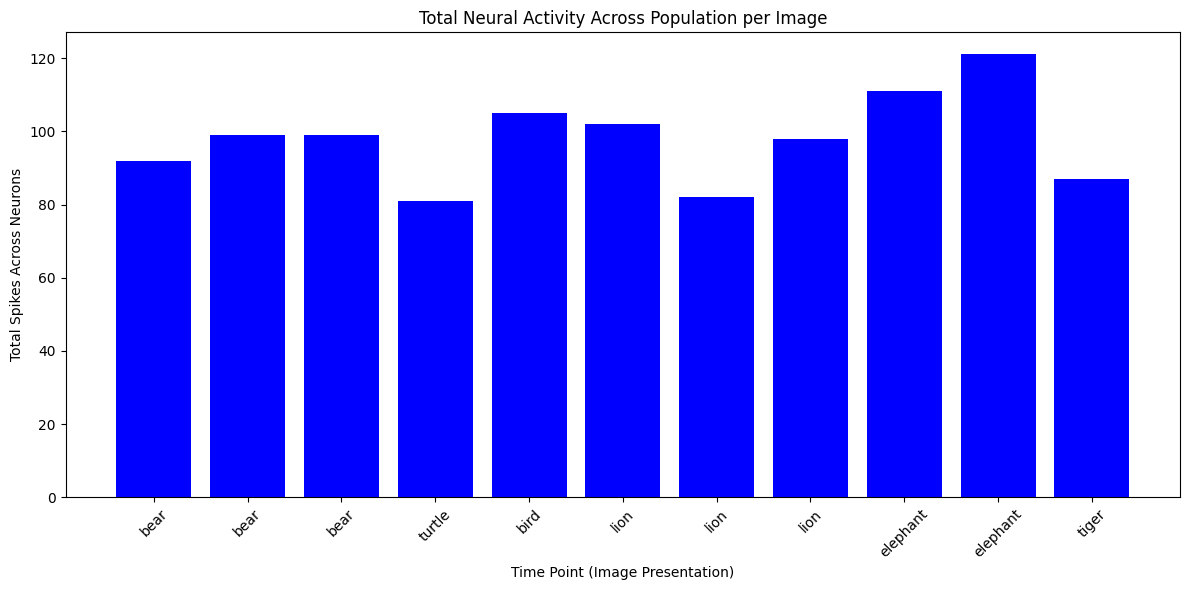

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Provided labels for the images
labels = ['bear', 'bear', 'bear', 'turtle', 'bird', 'lion', 'lion', 'lion', 'elephant', 'elephant', 'tiger']

# Load or generate embeddings for the images
# Replace this with your actual embeddings
# embeddings = dat['natural_scenes'][:len(labels)]
# For demonstration purposes, we'll generate random embeddings (replace with your actual embeddings)
np.random.seed(42)
embedding_dim = 768  # Example embedding dimensionality
embeddings = dat['natural_scenes'][:len(labels)]

# Normalize the embeddings to have unit length (L2 norm = 1)
embeddings_norm = embeddings / np.linalg.norm(embeddings, axis=1, keepdims=True)

# Simulate a population of neurons with random selectivities
num_neurons = 100  # Number of neurons in the population

# Generate random weight vectors for neurons (selectivity directions)
neuron_weights = np.random.randn(num_neurons, embedding_dim)
# Normalize the neuron weights to have unit length
neuron_weights_norm = neuron_weights / np.linalg.norm(neuron_weights, axis=1, keepdims=True)

# Define the bias term for each neuron (can be zeros or random)
biases = np.zeros(num_neurons)

# Linear-Nonlinear-Poisson model
def compute_lnp_neural_activity(embeddings, neuron_weights, biases):
    """
    Compute neural activity for a population of neurons using the LNP model.

    Parameters:
    - embeddings: array of shape (num_samples, embedding_dim)
    - neuron_weights: array of shape (num_neurons, embedding_dim)
    - biases: array of shape (num_neurons,)

    Returns:
    - spikes: array of shape (num_samples, num_neurons)
    - rates: array of shape (num_samples, num_neurons)
    """
    # Linear stage: Compute the dot product between embeddings and neuron weights
    # Resulting in a matrix of shape (num_samples, num_neurons)
    linear_response = np.dot(embeddings, neuron_weights.T) + biases  # Broadcasting biases

    # Nonlinear stage: Apply exponential non-linearity to get firing rates
    rates = np.exp(linear_response)

    # Poisson spiking stage: Simulate spikes based on Poisson distribution
    spikes = np.random.poisson(rates)

    return spikes, rates

# Compute neural activity
spikes, rates = compute_lnp_neural_activity(embeddings_norm, neuron_weights_norm, biases)

# For visualization, let's sum the spikes across neurons for each sample
total_spikes_per_sample = np.sum(spikes, axis=1)

# Plot the total spikes per image presentation
time_points = np.arange(len(labels))

plt.figure(figsize=(12, 6))
plt.bar(time_points, total_spikes_per_sample, color='b')
plt.xticks(time_points, labels, rotation=45)
plt.xlabel('Time Point (Image Presentation)')
plt.ylabel('Total Spikes Across Neurons')
plt.title('Total Neural Activity Across Population per Image')
plt.tight_layout()
plt.show()


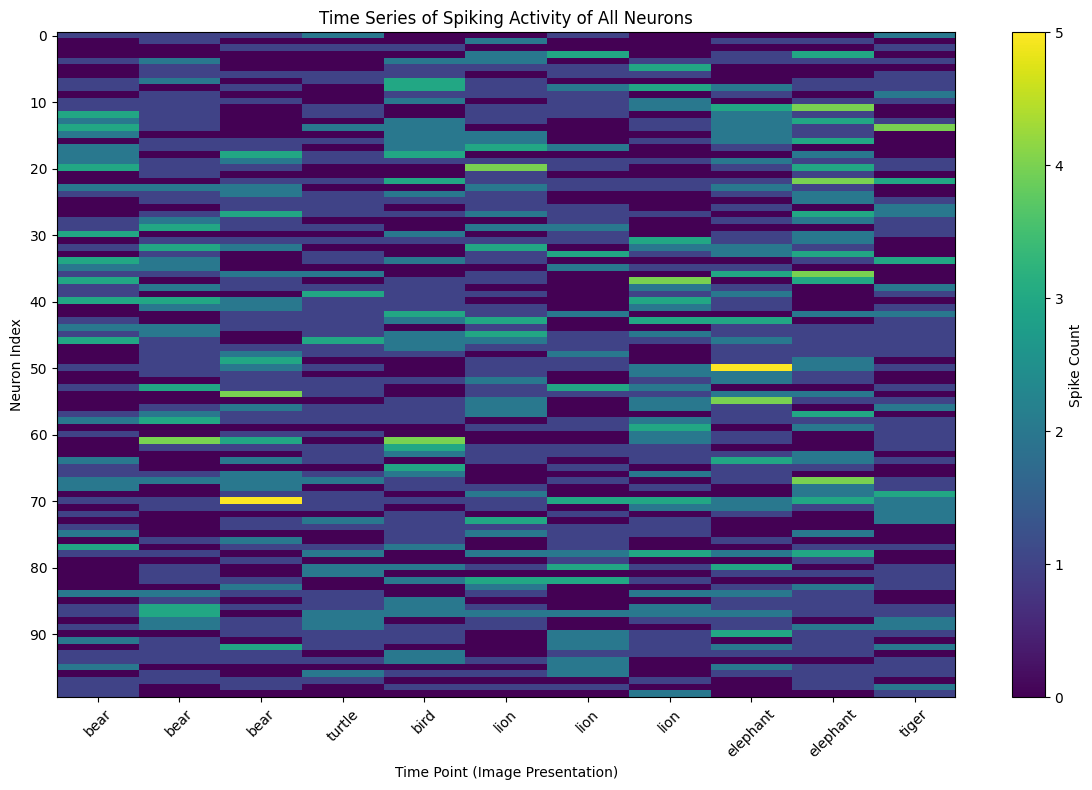

In [64]:
# Assume spikes and labels are already defined from your simulation
# spikes: array of shape (num_samples, num_neurons)
# labels: list of image labels

# Transpose spikes for plotting
spikes_transposed = spikes.T

# Plotting code as above
plt.figure(figsize=(12, 8))
plt.imshow(spikes_transposed, aspect='auto', interpolation='nearest', cmap='viridis')
plt.colorbar(label='Spike Count')
plt.xlabel('Time Point (Image Presentation)')
plt.ylabel('Neuron Index')
plt.title('Time Series of Spiking Activity of All Neurons')
plt.xticks(ticks=np.arange(len(labels)), labels=labels, rotation=45)
plt.yticks(ticks=np.arange(0, num_neurons, 10))
plt.tight_layout()
plt.show()

In [67]:
print(spikes.shape)

(11, 100)


In [69]:
np.random.seed(42)
embedding_dim = 768  # Example embedding dimensionality
embeddings = dat['natural_scenes']#[:len(labels)]

# Normalize the embeddings to have unit length (L2 norm = 1)
embeddings_norm = embeddings / np.linalg.norm(embeddings, axis=1, keepdims=True)

# Simulate a population of neurons with random selectivities
num_neurons = 100  # Number of neurons in the population

# Generate random weight vectors for neurons (selectivity directions)
neuron_weights = np.random.randn(num_neurons, embedding_dim)
# Normalize the neuron weights to have unit length
neuron_weights_norm = neuron_weights / np.linalg.norm(neuron_weights, axis=1, keepdims=True)

# Define the bias term for each neuron (can be zeros or random)
biases = np.zeros(num_neurons)

# Linear-Nonlinear-Poisson model
def compute_lnp_neural_activity(embeddings, neuron_weights, biases):
    """
    Compute neural activity for a population of neurons using the LNP model.

    Parameters:
    - embeddings: array of shape (num_samples, embedding_dim)
    - neuron_weights: array of shape (num_neurons, embedding_dim)
    - biases: array of shape (num_neurons,)

    Returns:
    - spikes: array of shape (num_samples, num_neurons)
    - rates: array of shape (num_samples, num_neurons)
    """
    # Linear stage: Compute the dot product between embeddings and neuron weights
    # Resulting in a matrix of shape (num_samples, num_neurons)
    linear_response = np.dot(embeddings, neuron_weights.T) + biases  # Broadcasting biases

    # Nonlinear stage: Apply exponential non-linearity to get firing rates
    rates = np.exp(linear_response)

    # Poisson spiking stage: Simulate spikes based on Poisson distribution
    spikes = np.random.poisson(rates)

    return spikes, rates

# Compute neural activity
spikes, rates = compute_lnp_neural_activity(embeddings_norm, neuron_weights_norm, biases)

In [71]:
spikes.shape

(118, 100)

In [90]:
import cebra
from cebra import CEBRA

cebra_model = CEBRA(
    model_architecture = "offset10-model",
    batch_size = 512,
    temperature_mode="auto",
    learning_rate = 0.001,
    max_iterations = 10,
    time_offsets = 10,
    output_dimension = 8,
    device = "cuda_if_available",
    verbose = False
)

timesteps = 5000
neurons = 50
out_dim = 8

cebra_model.fit(spikes)


CEBRA(batch_size=512, learning_rate=0.001, max_iterations=10,
      model_architecture='offset10-model', temperature_mode='auto',
      time_offsets=10)

In [91]:
nn = cebra_model.transform(spikes)

In [92]:
nn.shape
cebra.plot_embedding(nn)


<IPython.core.display.Javascript object>

<Axes3D: title={'center': 'Embedding'}>

In [93]:
plt.figure(figsize=(10,5))
ax1= plt.subplot(1,2,1)
ax1.imshow(spikes, aspect = 'auto', vmax = 1, vmin = 0, cmap ='gray_r')
ax1.set_ylabel('# Neurons')
ax1.set_xlabel('Time (s)')
ax1.set_xticks(np.linspace(0,118, 4))
ax1.set_xticklabels(np.linspace(0,30, 4))
ax1.set_title('Ca spikes')



<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Ca spikes')

In [87]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

# Assume nn is the learned embedding variable of shape (num_points, embedding_dim)
# Here, num_points can be the number of neurons, and embedding_dim is the dimension of the embedding

# For the 3D plot, we'll only use the first 3 dimensions of nn
# Ensure nn has at least 3 dimensions to plot
if nn.shape[1] >= 3:
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot of the first 3 dimensions of the embedding
    ax.scatter(nn[:, 0], nn[:, 1], nn[:, 2], c='b', marker='o', s=50, alpha=0.8)

    # Set labels for axes
    ax.set_xlabel('Embedding Dimension 1')
    ax.set_ylabel('Embedding Dimension 2')
    ax.set_zlabel('Embedding Dimension 3')

    # Set plot title
    ax.set_title('3D Visualization of Learned Embedding')

    # Show the plot
    plt.show()
else:
    print("The embedding nn has fewer than 3 dimensions. Cannot plot in 3D.")


<IPython.core.display.Javascript object>

In [94]:
np.save('spikes.npy',spikes)

In [95]:
np.save('nn.npy',nn)

In [1]:
import numpy as np
import zlib

def lempel_ziv_complexity(sequence):
    """Calculates Lempel-Ziv complexity using zlib's compression ratio as a proxy."""
    binary_string = ''.join(map(str, sequence))
    compressed_length = len(zlib.compress(binary_string.encode('utf-8')))
    original_length = len(binary_string)
    return compressed_length / original_length

# Example spike trains (generated and real)
generated_spike_train = np.random.choice([0, 1], size=1000, p=[0.9, 0.1])  # Example generated spike train
real_spike_train = np.random.choice([0, 1], size=1000, p=[0.8, 0.2])       # Example real spike train

# Calculate LZ complexity
generated_complexity = lempel_ziv_complexity(generated_spike_train)
real_complexity = lempel_ziv_complexity(real_spike_train)

print(f"Lempel-Ziv Complexity (Generated Spike Train): {generated_complexity:.4f}")
print(f"Lempel-Ziv Complexity (Real Spike Train): {real_complexity:.4f}")


Lempel-Ziv Complexity (Generated Spike Train): 0.1280
Lempel-Ziv Complexity (Real Spike Train): 0.1620


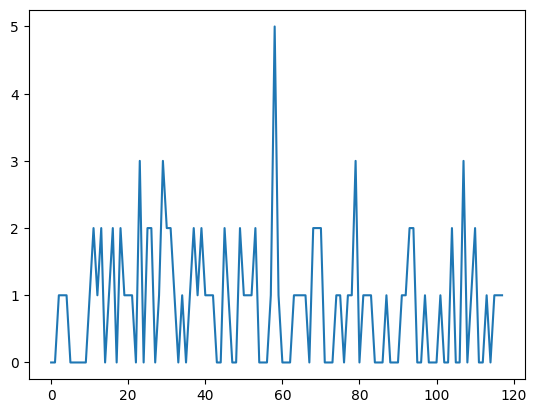

In [7]:
spikes=np.load('spikes.npy')
spikes.shape

import matplotlib.pyplot as plt

plt.plot(spikes[:,2])